In [1]:
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
import seaborn as sb


from steves_utils.summary_utils import (
    get_experiments_from_path
)

from steves_utils.utils_v2 import (
    get_experiments_base_path
)

In [2]:
experiments_to_get = [
#     "oracle.run2",
#     "oracle.run1",
#     "cores",
#     "metehan",
#     "wisig",
    "oracle.run1.framed",
    "oracle.run2.framed",
    "oracle.run2_limited",
    "oracle.run1_limited",
]

experiments = {}

for experiment in experiments_to_get:
    print(experiment)
    experiments[experiment] = get_experiments_from_path(
        os.path.join(get_experiments_base_path(), "tuned_1", experiment)
    )

oracle.run1.framed
oracle.run2.framed
oracle.run2_limited
oracle.run1_limited


In [3]:
all_trials = pd.DataFrame(columns=[
    "experiment_name",
    "source_val_label_accuracy",
    "target_val_label_accuracy",
    "x_transforms_source"
])

for experiment in experiments_to_get:   
    for trial in experiments[experiment]:
        f = pd.DataFrame(trial["results"])
        f["experiment_name"] = experiment
        f["x_transforms_source"] =  str(trial["parameters"]["x_transforms_source"])
        f = f[all_trials.columns]
        
        f = f.iloc[0] # Unknown why, but pandas is repeating trials for each domain in the trial!
        
        
        all_trials = all_trials.append(f)
    
all_trials = all_trials.reset_index(drop=True)
all_trials

,experiment_name,source_val_label_accuracy,target_val_label_accuracy,x_transforms_source
0,oracle.run1.framed,0.726736,0.674948,['unit_mag']
1,oracle.run1.framed,0.821007,0.754635,['unit_power']
2,oracle.run1.framed,0.062500,0.062500,['times_zero']
3,oracle.run1.framed,0.942274,0.889010,[]
4,oracle.run2.framed,0.768750,0.655521,['unit_mag']
5,oracle.run2.framed,0.764149,0.648542,['unit_power']
6,oracle.run2.framed,0.062500,0.062500,['times_zero']
7,oracle.run2.framed,0.938281,0.872656,[]
8,oracle.run2_limited,0.580208,0.487500,['unit_mag']
9,oracle.run2_limited,0.596701,0.483750,['unit_power']


In [4]:
m = pd.melt(all_trials, 
        id_vars=["experiment_name", "x_transforms_source"], 
        value_vars=[
            "source_val_label_accuracy",
            "target_val_label_accuracy",
        ])
m

,experiment_name,x_transforms_source,variable,value
0,oracle.run1.framed,['unit_mag'],source_val_label_accuracy,0.726736
1,oracle.run1.framed,['unit_power'],source_val_label_accuracy,0.821007
2,oracle.run1.framed,['times_zero'],source_val_label_accuracy,0.062500
3,oracle.run1.framed,[],source_val_label_accuracy,0.942274
4,oracle.run2.framed,['unit_mag'],source_val_label_accuracy,0.768750
5,oracle.run2.framed,['unit_power'],source_val_label_accuracy,0.764149
6,oracle.run2.framed,['times_zero'],source_val_label_accuracy,0.062500
7,oracle.run2.framed,[],source_val_label_accuracy,0.938281
8,oracle.run2_limited,['unit_mag'],source_val_label_accuracy,0.580208
9,oracle.run2_limited,['unit_power'],source_val_label_accuracy,0.596701


<Figure size 1080x3600 with 0 Axes>

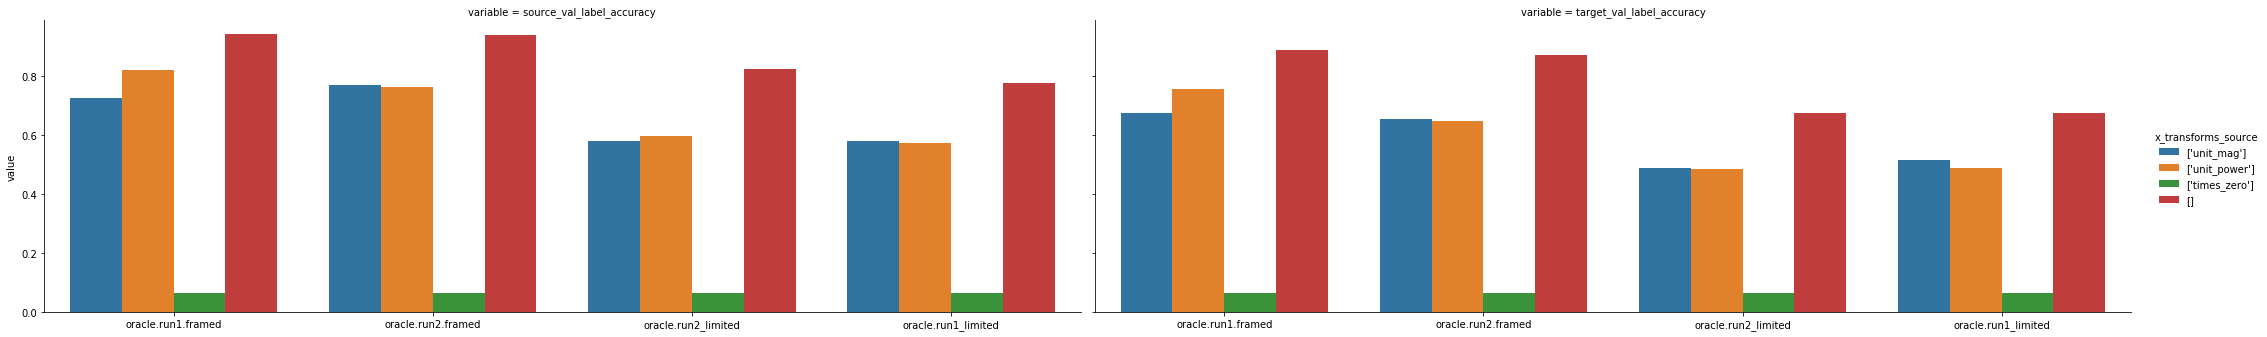

<Figure size 1080x3600 with 0 Axes>

In [7]:
fg = sb.catplot(x='experiment_name', col="variable", y='value', hue='x_transforms_source', 
                        data=m, kind='bar', height=5, aspect=3, col_wrap=2)
fg.set_xlabels('')
plt.figure(figsize=(15,50))
